<a href="https://colab.research.google.com/github/KenDaupsey/Basic-Poisson-Regression-Using-Python/blob/main/Basic_Poisson_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Basic Poisson Regression**

In [25]:
### Import Necessary Datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
### Load Dataset and Examine First 5 Rows
url= "https://raw.githubusercontent.com/KenDaupsey/Basic-Poisson-Regression-Using-Python/main/PoissonDaysAbsentData.csv"

df = pd.read_csv(url)
df.head()

,id,gender,ethnic,school,mathpr,langpr,mathnce,langnce,biling,daysabs
0,1001,male,hispanic,1,63,36,56.988830,42.450860,RFEP,4
1,1002,male,hispanic,1,27,44,37.094160,46.820587,RFEP,4
2,1003,female,hispanic,1,20,38,32.275455,43.566574,RFEP,2
3,1004,female,hispanic,1,16,38,29.056717,43.566574,RFEP,3
4,1005,female,hispanic,1,2,14,6.748048,27.248474,LEP,3


In [28]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,316.0,1576.338608,502.363805,1001.000000,1079.750000,1158.500000,2078.250000,2157.00000
school,316.0,1.496835,0.500783,1.000000,1.000000,1.000000,2.000000,2.00000
mathpr,316.0,48.420886,25.442685,1.000000,28.000000,48.000000,70.000000,99.00000
langpr,316.0,50.414557,25.321344,1.000000,32.000000,50.000000,70.000000,99.00000
mathnce,316.0,48.751011,17.880756,1.007114,37.725357,48.943764,61.043877,98.99289
langnce,316.0,50.063794,17.939210,1.007114,40.150265,50.000000,61.043877,98.99289
daysabs,316.0,5.810127,7.449003,0.000000,1.000000,3.000000,8.000000,45.00000


In [29]:
df.columns

Index(['id', 'gender', 'ethnic', 'school', 'mathpr', 'langpr', 'mathnce',
       'langnce', 'biling', 'daysabs'],
      dtype='object')

In [30]:
df.dtypes

id           int64
gender      object
ethnic      object
school       int64
mathpr       int64
langpr       int64
mathnce    float64
langnce    float64
biling      object
daysabs      int64
dtype: object

<ipython-input-31-95ce244e3de1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


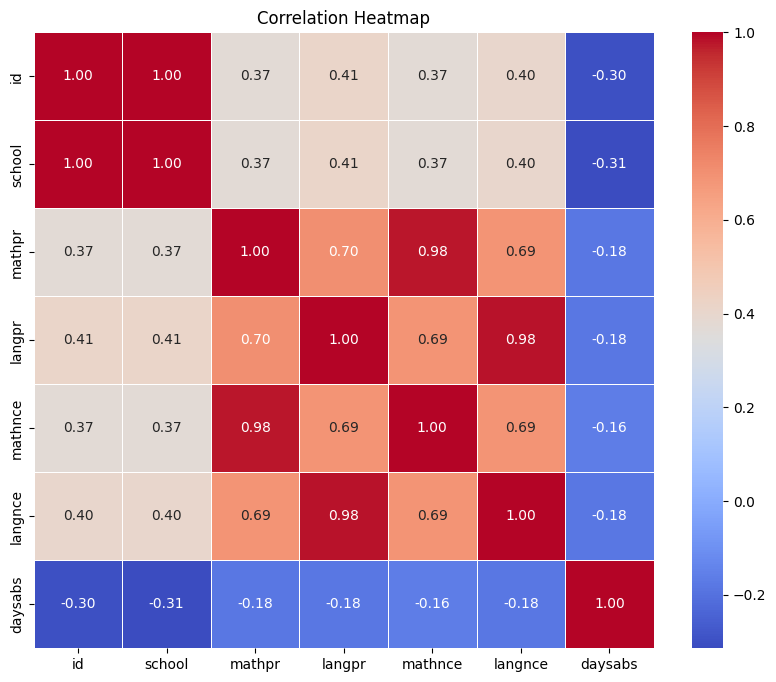

In [31]:
### Assessing Correlation:
# Calculate correlation matrix
corr_matrix = df.corr()

import seaborn as sns

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

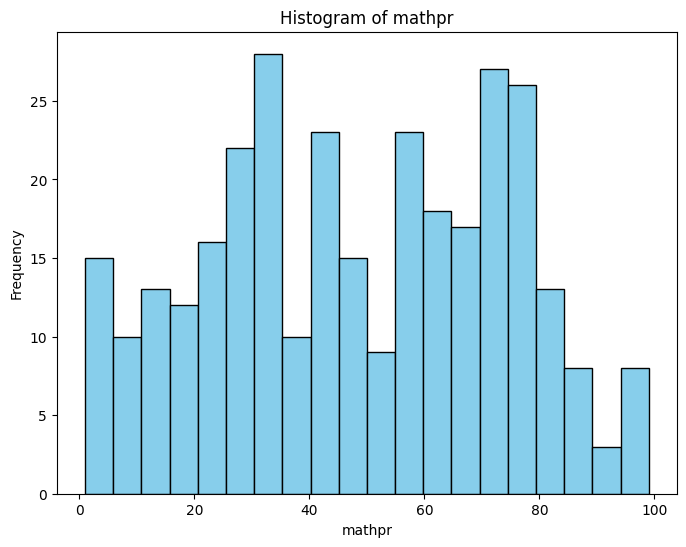

In [32]:
# Histogram for 'mathpr'
plt.figure(figsize=(8, 6))
plt.hist(df['mathpr'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of mathpr')
plt.xlabel('mathpr')
plt.ylabel('Frequency')
plt.show()

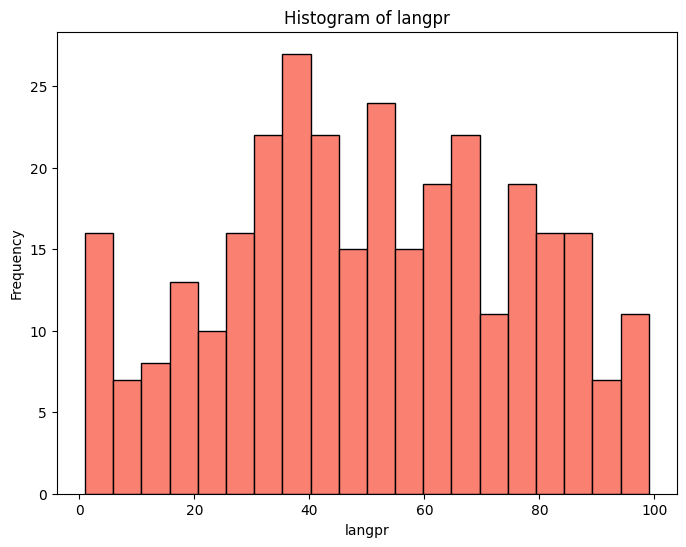

In [33]:
# Histogram for 'langpr'
plt.figure(figsize=(8, 6))
plt.hist(df['langpr'], bins=20, color='salmon', edgecolor='black')
plt.title('Histogram of langpr')
plt.xlabel('langpr')
plt.ylabel('Frequency')
plt.show()

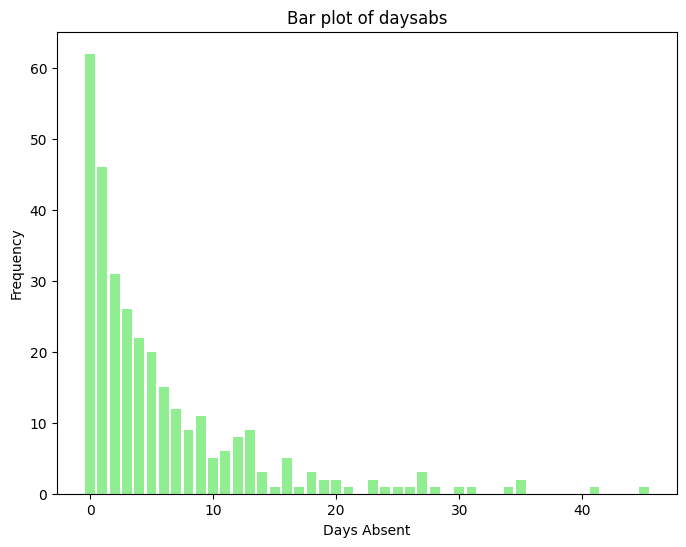

In [34]:
# Bar plot for 'daysabs'
plt.figure(figsize=(8, 6))
plt.bar(df['daysabs'].value_counts().index, df['daysabs'].value_counts().values, color='lightgreen')
plt.title('Bar plot of daysabs')
plt.xlabel('Days Absent')
plt.ylabel('Frequency')
plt.show()

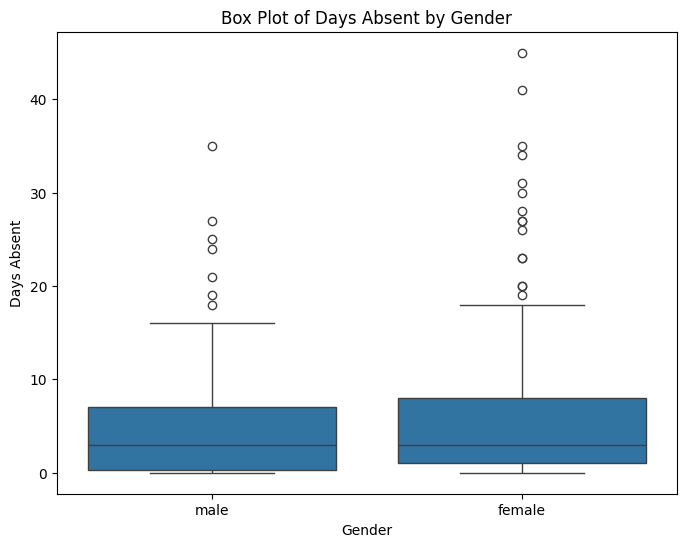

In [35]:
## Exploring Gender by days absent:

# Box plot for 'gender' vs. 'daysabs'
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='daysabs', data=df)
plt.title('Box Plot of Days Absent by Gender')
plt.xlabel('Gender')
plt.ylabel('Days Absent')
plt.show()

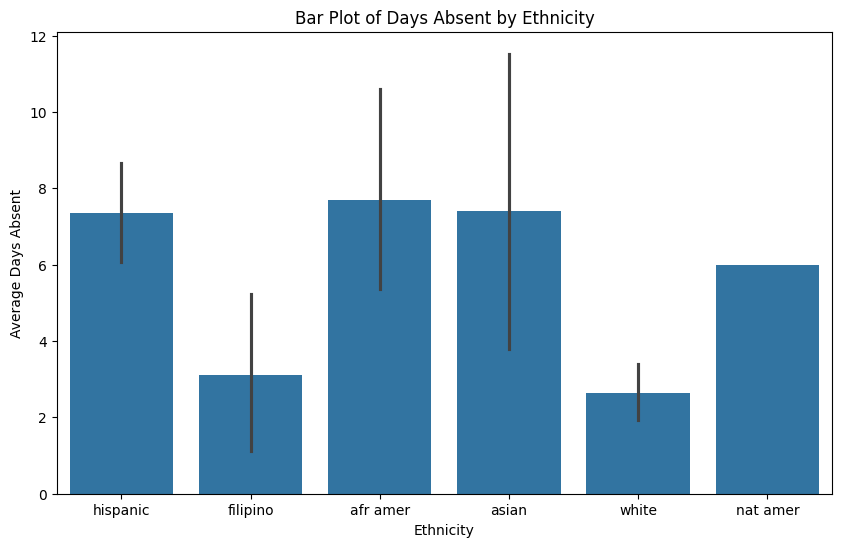

In [36]:
# Bar plot for 'ethnic' vs. 'daysabs'
plt.figure(figsize=(10, 6))
sns.barplot(x='ethnic', y='daysabs', data=df)
plt.title('Bar Plot of Days Absent by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Average Days Absent')
plt.show()

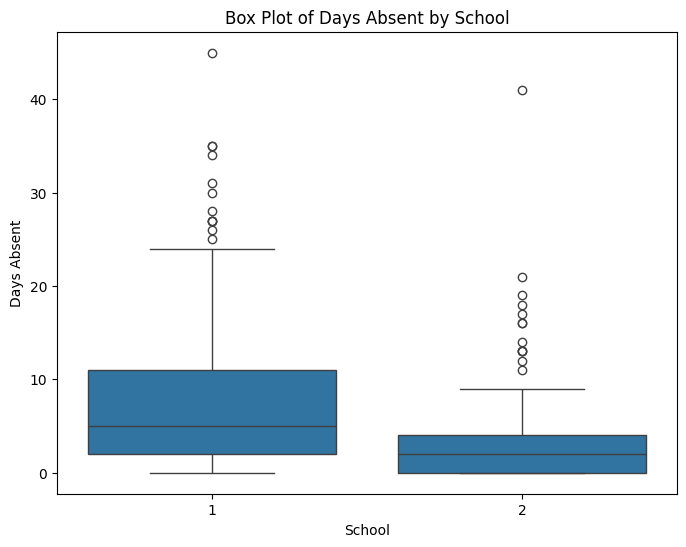

In [37]:
# Box plot for 'school' vs. 'daysabs'
plt.figure(figsize=(8, 6))
sns.boxplot(x='school', y='daysabs', data=df)
plt.title('Box Plot of Days Absent by School')
plt.xlabel('School')
plt.ylabel('Days Absent')
plt.show()

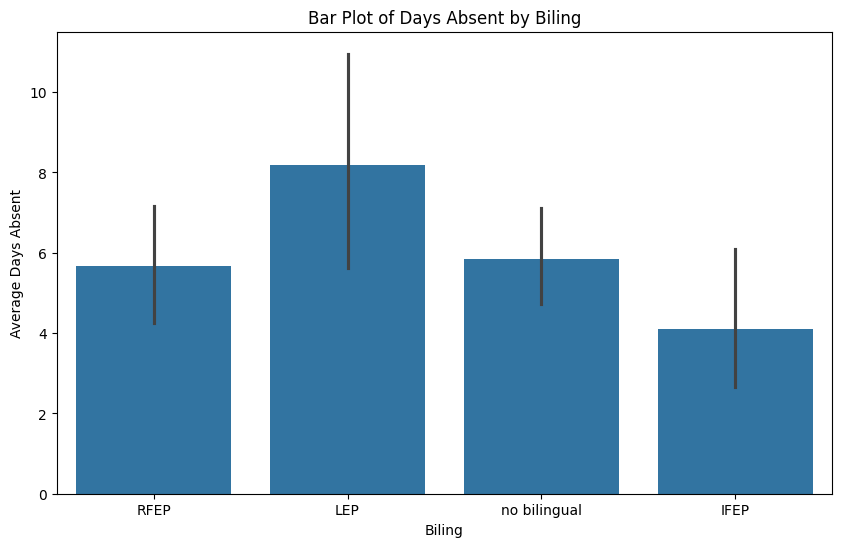

In [38]:
# Bar plot for 'biling' vs. 'daysabs'
plt.figure(figsize=(10, 6))
sns.barplot(x='biling', y='daysabs', data=df)
plt.title('Bar Plot of Days Absent by Biling')
plt.xlabel('Biling')
plt.ylabel('Average Days Absent')
plt.show()

** Feature Engineering; Creating New Variable **

In [39]:
### Feature Engineering:
## Create new features or transformations of existing ones that may better capture
# the relationship with 'daysabs', such as interaction terms or polynomial features.

# Example: Interaction between 'mathpr' and 'langpr'
df['mathpr_langpr_interaction'] = df['mathpr'] * df['langpr']

df.head()

,id,gender,ethnic,school,mathpr,langpr,mathnce,langnce,biling,daysabs,mathpr_langpr_interaction
0,1001,male,hispanic,1,63,36,56.988830,42.450860,RFEP,4,2268
1,1002,male,hispanic,1,27,44,37.094160,46.820587,RFEP,4,1188
2,1003,female,hispanic,1,20,38,32.275455,43.566574,RFEP,2,760
3,1004,female,hispanic,1,16,38,29.056717,43.566574,RFEP,3,608
4,1005,female,hispanic,1,2,14,6.748048,27.248474,LEP,3,28


In [40]:
df.columns

Index(['id', 'gender', 'ethnic', 'school', 'mathpr', 'langpr', 'mathnce',
       'langnce', 'biling', 'daysabs', 'mathpr_langpr_interaction'],
      dtype='object')

In [41]:
### We just want to see how the variable “ethnic’ is categorized:

df['ethnic'].value_counts()

hispanic    144
white        98
afr amer     39
asian        25
filipino      9
nat amer      1
Name: ethnic, dtype: int64

In [42]:
###POISSON REGRESSION MODEL FITTING

import pandas as pd
import statsmodels.api as sm

# Assuming df is your DataFrame

# Define dependent variable
y = df['daysabs']

# Define independent variables
X = df[['mathpr', 'langpr', 'mathnce', 'langnce', 'gender', 'ethnic', 'school', 'biling', 'mathpr_langpr_interaction']]

# Convert categorical variables to dummy variables without dropping the first category
X = pd.get_dummies(X, drop_first=False)

# Add intercept term
X = sm.add_constant(X)

# Fit Poisson regression model
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Display model summary
print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                daysabs   No. Observations:                  316
Model:                            GLM   Df Residuals:                      300
Model Family:                 Poisson   Df Model:                           15
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1375.8
Date:                Mon, 04 Mar 2024   Deviance:                       1890.2
Time:                        20:11:58   Pearson chi2:                 2.30e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.8069
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 